In [1]:
import earthkit.data
import earthkit.plots
from earthkit.regrid import interpolate
from earthkit.plots.interactive import Chart

import plotly.io as pio
pio.renderers.default = "notebook_connected"

# Earhtkit Data Examples with Mars source
## Using IFS data from Mars

### Refer to [this section on MARS data sources](https://earthkit-data.readthedocs.io/en/latest/guide/sources.html#data-sources-mars)

In [2]:
cache_path = earthkit.data.config.get("user-cache-directory")

earthkit.data.config.set(
    # The default is to use mars client when available,
    # So we force it to use WebAPI for demo purposes
    "use-standalone-mars-client-when-available", False)
# earthkit.data.config.reset() 
earthkit.data.config

Name,Value,Default
cache-policy,'off','off'
check-out-of-date-urls,True,True
download-out-of-date-urls,False,False
grib-field-policy,'persistent','persistent'
grib-file-serialisation-policy,'path','path'
grib-handle-cache-size,1,1
grib-handle-policy,'cache','cache'
maximum-cache-disk-usage,'95%','95%'
maximum-cache-size,None,None
number-of-download-threads,5,5


## 1) Mean Sea Level Pressure
### Regridding, Area Bounded

In [3]:
request_1 = {
    "class": "od",
    "date": "2025-09-28",
    "expver": 1,
    "stream": "oper",
    "time": "00",
    "type": "fc",
    "levtype": "sfc",
    "param": "151",
    "step": 0,
    "grid": "0.1/0.1", # regrid to lat lon because orig in reduced gaussian
    "area" : "40/-85/20/-55", #+N, -W, -S, +E
}
data_1 = earthkit.data.from_source(
    "mars", request_1
)

2025-10-14 20:49:52 ECMWF API python library 1.6.5
2025-10-14 20:49:52 ECMWF API at https://api.ecmwf.int/v1
2025-10-14 20:49:52 Welcome Alice Sartori Monteiro de Barros
2025-10-14 20:49:53 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2025-10-14 20:49:53 Request submitted
2025-10-14 20:49:53 Request id: 68eeb7719ac9b6b1015db6a3
2025-10-14 20:49:53 Request is submitted
2025-10-14 20:49:54 Request is queued
2025-10-14 20:49:59 Calling 'nice mars /tmp/20251014-2040/64/tmp-_mars-252r6I-70f56144d57bb6261dfa8c640261bbb8.req'
2025-10-14 20:49:59 Forcing MIR_CACHE_PATH=/data/ec_coeff
2025-10-14 20:49:59 mars - WARN -
2025-10-14 20:49:59 mars - WARN -
2025-10-14 20:49:59 MIR environment variables:
2025-10-14 20:49:59 MIR_CACHE_PATH=/data/ec_coeff
2025-10-14 20:49:59 MIR_LSM_NAMED=1km.climate.v013
2025-10-14 20:49:59 Using MARS binary: /usr/local/apps/mars/versions/6.33.24.5/bin/mars.bin
2025-10-14 20:49:59 mars - INFO

# Check your request status [here](https://apps.ecmwf.int/webmars/joblist/), it should show up on webapi

In [4]:
data_1.ls() # grib data returned

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,msl,surface,0,20250928,0,0,fc,0,regular_ll


ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...


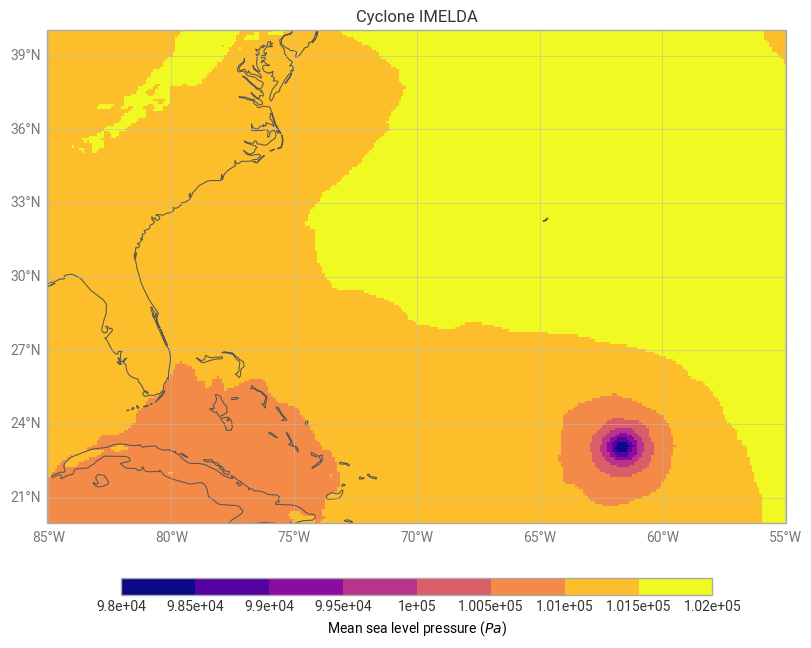

In [5]:
chart = earthkit.plots.Map()
chart.grid_cells(
    data_1
)
chart.legend()
chart.title("Cyclone IMELDA")
chart.coastlines()
chart.gridlines()
chart.show()

## 2) Wind
### Client Side Regridding

In [9]:
request_2 = {
    "class": "od",
    "date": "2025-09-28",
    "expver": 1,
    "stream": "oper",
    "type": "fc",
    "time": "00",
    "param": ["165", "166"],
    "levtype": "sfc",
}

data_2 = earthkit.data.from_source(
    "mars", request_2
)

2025-10-14 20:50:20 ECMWF API python library 1.6.5
2025-10-14 20:50:20 ECMWF API at https://api.ecmwf.int/v1
2025-10-14 20:50:20 Welcome Alice Sartori Monteiro de Barros
2025-10-14 20:50:20 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2025-10-14 20:50:20 Request submitted
2025-10-14 20:50:20 Request id: 68eeb78c9905eb439c5daf7b
2025-10-14 20:50:20 Request is submitted
2025-10-14 20:50:21 Request is active
2025-10-14 20:50:27 Calling 'nice mars /tmp/20251014-2050/48/tmp-_mars-60cBC0-3cd7d16a0b564f31ef41f87f78f46b55.req'
2025-10-14 20:50:27 Forcing MIR_CACHE_PATH=/data/ec_coeff
2025-10-14 20:50:27 mars - WARN -
2025-10-14 20:50:27 mars - WARN -
2025-10-14 20:50:27 MIR environment variables:
2025-10-14 20:50:27 MIR_CACHE_PATH=/data/ec_coeff
2025-10-14 20:50:27 MIR_LSM_NAMED=1km.climate.v013
2025-10-14 20:50:27 Using MARS binary: /usr/local/apps/mars/versions/6.33.24.5/bin/mars.bin
2025-10-14 20:50:27 mars - INFO

In [55]:
# data_2.to_target("file", "test.grib")

In [10]:
data_2.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,10u,surface,0,20250928,0,0,fc,0,reduced_gg
1,ecmf,10v,surface,0,20250928,0,0,fc,0,reduced_gg


In [11]:
metadata = data_2[0].metadata()
metadata.dump() # Data in ocahedral reduced gaussian O2560

globalDomain,g
GRIBEditionNumber,1
eps,0
offsetSection0,0
section0Length,8
totalLength,13204588
editionNumber,1
WMO,0
productionStatusOfProcessedData,0
section1Length,52
table2Version,128


In [12]:
# Client Side Regridding with Earhtkit Regrid
data_latlon = earthkit.regrid.interpolate(
    data_2,
    # in_grid={"grid": "O2560"}, # no need to add in_grid, automatic dectection
    out_grid={"grid": [0.5, 0.5]}, 
    method="linear"
)

In [31]:
data_latlon.ls() # Now in Lat/Lon

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,10u,surface,0,20250928,0,0,fc,0,regular_ll
1,ecmf,10v,surface,0,20250928,0,0,fc,0,regular_ll


ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...
ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...


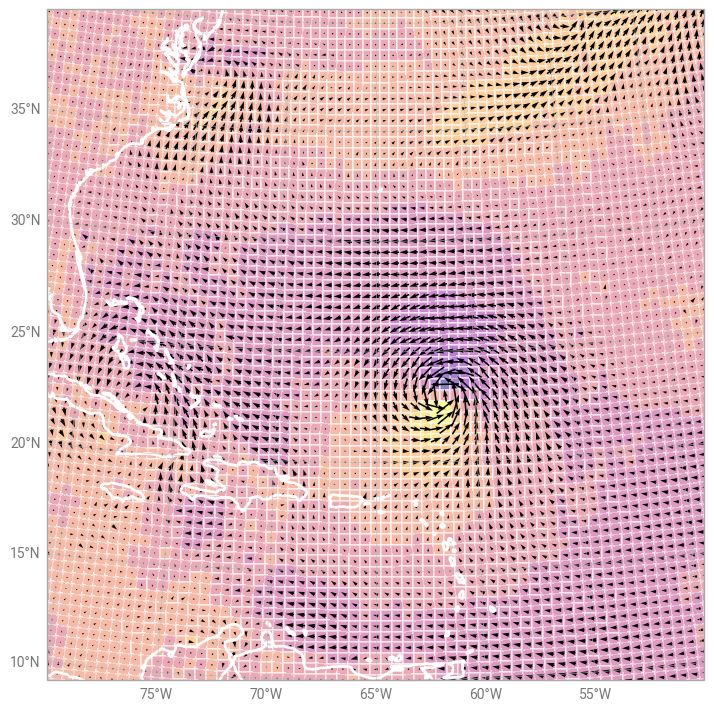

In [13]:
from earthkit.plots.resample import Subsample

chart = earthkit.plots.Map(domain=[-80, -50, 10, 40])

chart.grid_cells(
    data_latlon.sel(short_name="10u"), edgecolors="white", linewidths=0.3, alpha=0.5)

chart.quiver(data_latlon, resample=Subsample(1, mode="stride"))

chart.coastlines(color="white", linewidth=2)
chart.gridlines()
chart.show()

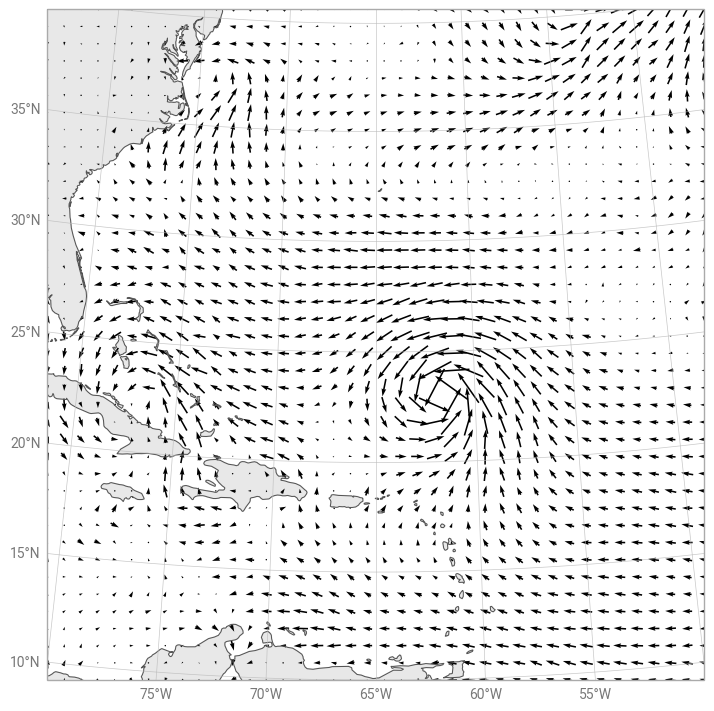

In [14]:
# Simple Plot

chart = earthkit.plots.Map(domain=[-80, -50, 10, 40])

# Automatically detect U and V fields and plot vectors
chart.quiver(data_latlon)

chart.coastlines()
chart.land()
chart.gridlines()

chart.show()